In [37]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1)

In [26]:
def valor_medio(f, a_x, b_x, a_y, b_y, n):
    x = (b_x - a_x)*np.random.random(n) + a_x
    y = (b_y - a_y)*np.random.random(n) + a_y
    i = (b_x-a_x)*(b_y-a_y)*(np.sum(f(x, y))) / n
    return i

In [27]:
a_x, b_x = 1, 5
a_y, b_y = -5, 5
i_excato = 1.33199*(10**9)
f = lambda x,y: ((y**2)*np.exp(-y**2)+(x**4)*np.exp(-x**2))/(x*np.exp(-x**2))

In [34]:
n = 10**5
i_medio = valor_medio(f, a_x, b_x, a_y, b_y, n)
e_abs = np.abs(i_medio - i_excato)/np.abs(i_excato)
print("Para n = 10^5")
print("Valor medio: ", i_medio)
print("Error: ", e_abs)

Para n = 10^5
Valor medio:  1332476083.3708673
Error:  0.0003649301953222264


In [35]:
n = 10**6
i_medio = valor_medio(f, a_x, b_x, a_y, b_y, n)
e_abs = np.abs(i_medio - i_excato)/np.abs(i_excato)
print("Para n = 10^6")
print("Valor medio: ", i_medio)
print("Error: ", e_abs)

Para n = 10^6
Valor medio:  1343100179.884367
Error:  0.008341038509573637


In [36]:
n = 10**7
i_medio = valor_medio(f, a_x, b_x, a_y, b_y, n)
e_abs = np.abs(i_medio - i_excato)/np.abs(i_excato)
print("Para n = 10^7")
print("Valor medio: ", i_medio)
print("Error: ", e_abs)

Para n = 10^7
Valor medio:  1335280558.864427
Error:  0.0024704080844654163


## 2)

In [38]:
def CamAleaPasosVar(N, trials, lambda_param):
    start_time = time.time()
    X = np.zeros((trials, N))
    
    for i in range(N):
        steps = np.random.exponential(scale=1/lambda_param, size=trials)
        directions = np.random.choice([-1, 1], size=trials)
        dx = steps * directions
        X[:, i] = dx
    
    X = np.cumsum(X, axis=1)
    R2 = np.mean(X**2, axis=0)
    Xmean = np.mean(X, axis=0)
    XparaN = X[:, -1]
    
    tiempo = time.time() - start_time
    nu = np.log(R2[-1]) / np.log(N) 
    
    return Xmean, R2, XparaN, nu, tiempo

In [39]:
def plots(N, Xmean, R2, XparaN, title, nu, tiempo):
    Ngraf = np.arange(1, N + 1)
    fig = plt.figure(figsize=(14, 7))  # Adjusted for better visibility

    # Plot ⟨X⟩, ⟨X^2⟩, and ⟨(ΔX)^2⟩
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(Ngraf, Xmean, 'b', label=r'$\langle X \rangle$')
    ax1.plot(Ngraf, Xmean**2, 'r', label=r'$\langle X^2 \rangle$')
    ΔX2 = R2 - Xmean**2
    ax1.plot(Ngraf, ΔX2, 'g', label=r'$\langle (\Delta X)^2 \rangle$')
    ax1.legend(loc='best', fontsize=12)
    ax1.set_xlabel(r'$N$', fontsize=18)
    ax1.set_ylabel('Values', fontsize=18)
    ax1.set_title(title)

    # Plot R^2 over N
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(Ngraf, R2, 'b', label=r'$R^2$ vs. $N$')
    ax2.legend(loc='best', fontsize=12)
    ax2.set_xlabel(r'$N$', fontsize=18)
    ax2.set_ylabel(r'$R^2$', fontsize=18)

    # Plot P(x) over x
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.hist(XparaN, bins=50, density=True, label='Histogram of $X_N$')
    ax3.set_xlabel(r'$x$', fontsize=18)
    ax3.set_ylabel(r'$P(x)$', fontsize=18)
    ax3.legend(loc='best', fontsize=12)

    # Title for the entire figure
    fig.suptitle(f'Exponente ν: {nu:.4f}, Tiempo de ejecución: {tiempo:.2f} s', fontsize=16)

    fig.tight_layout()
    plt.show()

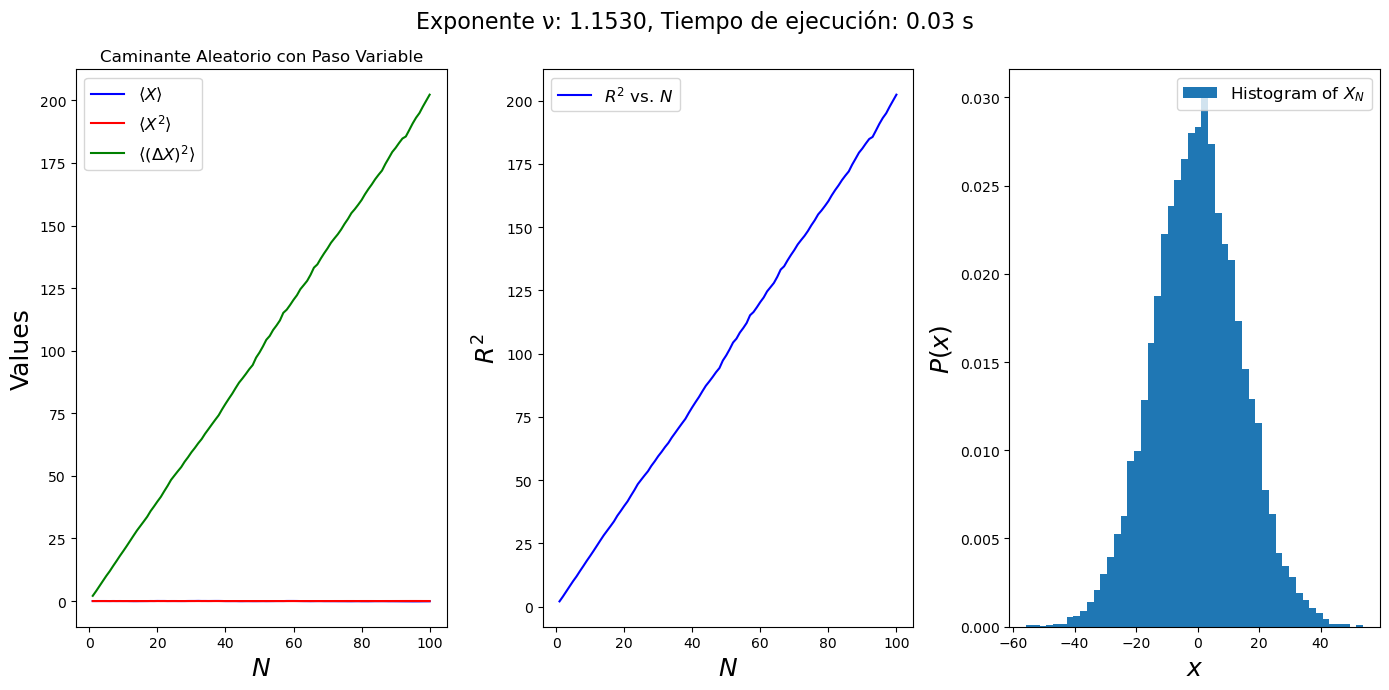

In [40]:
N = 100  
trials = 10000
lambda_param = 1.0  # Esto es 1 sobre el valor esperado de la longitud del paso.

Xmean, R2, XparaN, nu, tiempo = CamAleaPasosVar(N, trials, lambda_param)
plots(N, Xmean, R2, XparaN, "Caminante Aleatorio con Paso Variable", nu, tiempo)
